<a href="https://colab.research.google.com/github/matheussfsp/mvp1/blob/main/MVP1_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Matheus dos Santos Figueroa Sanmartin Perie

**Matrícula:** 4052025000067

**Dataset:** [Indicadores trimestrales del transporte ferroviario de viajeros](https://data.cnmc.es/transporte-y-postal/transporte/conjuntos-de-datos/indicadores-trimestrales-del-transporte-0)


# Descrição do Problema

O dataset de transporte ferroviário disponibilizado pela CNMC (Comisión Nacional de los Mercados y la Competencia) contém informações trimestrais sobre a operação de trens de passageiros na Espanha. O conjunto de dados inclui diversos tipos de serviços como Cercanías (trens metropolitanos), Media Distancia (média distância) e Larga Distancia (longa distância).


*Informações trimestrais sobre o transporte ferroviário do Traveler são oferecidas Desde 2016 para diferentes tipos de produto: Cercanías, distância da mídia e longa distância (convencional e alta velocidade para os dois últimos produtos) das empresas que operam no mercado.*

As siglas usadas correspondem a:
- *LD AV: longa distância de longa distância.*
- *LD convencional: longa distância convencional.*
- *MD AV: Médio de alta velocidade.*
- *MD convencional: distância convencional média.*
- *Cercanías*

(Traduzido do [link](https://data.cnmc.es/transporte-y-postal/transporte/conjuntos-de-datos/indicadores-trimestrales-del-transporte-0) onde estão hospedados os dados)

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Analisar assentos ofertados ao longo do tempo para tentar entender se o sistema ferroviário vem disponibilizando mais ou menos espaços.

- Eficiência: analisar Passageiros/KM - trens de cercanías (i.e atuam em região metropolitana) transportam mais passageiros por KM, mas desejamos verificar se Média Distância também seria mais eficiente que longa distância

- Verificar eficiencia entre convencionais e alta Velocidade (AV) - dividindo em grupos de AV (Média e Longa distâncias) e Convencional (Média e Longa distâncias).



## Seleção de Dados

O dataset "Indicadores trimestrales del transporte ferroviario de viajeros"
é um conjunto de dados disponibilizado pela "Comisión Nacional de los Mercados y la Competencia" e também é publicado no portal oficial de dados do governo da Espanha (datos.gob.es). As informações sao trimestrais e são coletadas desde 2016 e tem como objetivo divulgar dados de passageiros do sistema ferroviário espanhol.

O dataset apresenta os seguintes atributos:

- Trimestre - Identificação do período (formato: ano + trimestre).

- Tipo de producto - Categoria do serviço: Cercanías (região metropolitana), Media Distancia Alta Velocidade, Larga Distancia Convencional e Larga Distancia Alta Velocidad.

- Corredor - Rota ferroviária específica. Observação: alguns "Tipo de producto" não possuem a separação, então foi usado o termo "Total".

- Empresa - Empresa responsável pela operação

- Tipo de servicio - Classificação como Comercial ou Obrigação do Serviço Público (OSP).

- Ingresos por venta de billetes (€) - Receita com a venda de bilhetes (coluna excluída na presente análise devido à alta quantidade de valores ausentes).

- Plazas ofertadas - Quantidade de assentos ofertados no período.

- Plazas-km ofertadas - Total de assentos multiplicado pelos quilômetros operados (indicador de capacidade).

- Tren-km - Quilômetros percorridos pelos trens.

- Viajeros - Número de passageiros transportados.

- Viajeros-km - Total de quilômetros percorridos por todos passageiros no período específico. Soma dos km que cada passageiro percorreu. Volume total realizado

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e limpeza dos dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar o CSV a partir da web
dados = "https://catalogodatos.cnmc.es/dataset/ds_13591_1/resource/2cfcb1eb-f5ef-4b14-bc99-739493704bc2/download/ds_13591_1.csv"
df = pd.read_csv(dados, sep=";", encoding="utf-8")
df.head()

,Trimestre,Tipo de producto,Corredor,Empresa,Tipo de servicio,Ingresos por venta de billetes (€),Plazas Ofertadas (Núm),Plazas.km Ofertadas (Plazas.km),Tren.km (Tren.km),Viajeros (Núm),Viajeros.km (Viajeros.km)
0,2016T1,Cercanías,Total,Total,OSP,NaN,NaN,5.836879e+09,16638744.0,100892888.0,1.924136e+09
1,2016T1,LD AV,Madrid-Alicante,Renfe Viajeros S.A.U.,Comercial,NaN,NaN,1.857033e+08,587646.0,355281.0,1.356036e+08
2,2016T1,LD AV,Madrid-Barcelona,Renfe Viajeros S.A.U.,Comercial,NaN,NaN,1.229535e+09,3060141.0,1826917.0,8.523592e+08
3,2016T1,LD AV,Madrid-Málaga/Granada,Renfe Viajeros S.A.U.,Comercial,NaN,NaN,3.626520e+08,1009358.0,538725.0,2.478756e+08
4,2016T1,LD AV,Madrid-Sevilla,Renfe Viajeros S.A.U.,Comercial,NaN,NaN,4.446413e+08,1318513.0,785860.0,3.330029e+08


In [3]:
#verificar celulas vazias e demais conteúdos
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 469

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Trimestre                           469 non-null    object 
 1   Tipo de producto                    469 non-null    object 
 2   Corredor                            469 non-null    object 
 3   Empresa                             469 non-null    object 
 4   Tipo de servicio                    469 non-null    object 
 5   Ingresos por venta de billetes (€)  17 non-null     float64
 6   Plazas Ofertadas (Núm)              372 non-null    float64
 7   Plazas.km Ofertadas (Plazas.km)     452 non-null    float64
 8   Tren.km (Tren.km)                   452 non-null    float64
 9   Viajeros (Núm)                      452 non-null    float64
 10  Viajeros.km (Viajeros.km)           452 non-null    float

In [4]:
#Exclusao dos dados de "Ingressos por venta de billetes (€)" uma vez que possuem muitos nulos.
df2 = df.drop(columns=["Ingresos por venta de billetes (€)"], inplace=False)

In [5]:
#df2 é o data frame que será utilizado a partir de agora.
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Trimestre                        469 non-null    object 
 1   Tipo de producto                 469 non-null    object 
 2   Corredor                         469 non-null    object 
 3   Empresa                          469 non-null    object 
 4   Tipo de servicio                 469 non-null    object 
 5   Plazas Ofertadas (Núm)           372 non-null    float64
 6   Plazas.km Ofertadas (Plazas.km)  452 non-null    float64
 7   Tren.km (Tren.km)                452 non-null    float64
 8   Viajeros (Núm)                   452 non-null    float64
 9   Viajeros.km (Viajeros.km)        452 non-null    float64
dtypes: float64(5), object(5)
memory usage: 36.8+ KB
None


In [6]:
# Foi identificado que a coluna "Plazas Ofertadas" possui algumas observações ausentes. Como não são muitos, antes de tomar a decisão de excluir irei
#verificar como estes valores em branco estão distribuidos e assim tomar a melhor decisão de como organizá-los.
trimestres_com_nan = df2[df2["Plazas Ofertadas (Núm)"].isnull()]["Trimestre"].unique()

# Exibir os trimestres com valores ausentes
print("Trimestres com 'Plazas Ofertadas' ausentes:")
print(trimestres_com_nan)


Trimestres com 'Plazas Ofertadas' ausentes:
['2016T1' '2016T2' '2016T3' '2016T4' '2017T1' '2017T2' '2017T3' '2017T4'
 '2023T1' '2023T2' '2023T3' '2023T4' '2024T1' '2024T2' '2024T3' '2024T4'
 '2025T1']


In [7]:
#Filtro de linhas vazias
linhas_nan = df2[df2['Plazas Ofertadas (Núm)'].isnull()]
pd.set_option('display.max_rows', None)

# Exibir as linhas filtradas
display(linhas_nan)

,Trimestre,Tipo de producto,Corredor,Empresa,Tipo de servicio,Plazas Ofertadas (Núm),Plazas.km Ofertadas (Plazas.km),Tren.km (Tren.km),Viajeros (Núm),Viajeros.km (Viajeros.km)
0,2016T1,Cercanías,Total,Total,OSP,NaN,5.836879e+09,16638744.0,100892888.0,1.924136e+09
1,2016T1,LD AV,Madrid-Alicante,Renfe Viajeros S.A.U.,Comercial,NaN,1.857033e+08,587646.0,355281.0,1.356036e+08
2,2016T1,LD AV,Madrid-Barcelona,Renfe Viajeros S.A.U.,Comercial,NaN,1.229535e+09,3060141.0,1826917.0,8.523592e+08
3,2016T1,LD AV,Madrid-Málaga/Granada,Renfe Viajeros S.A.U.,Comercial,NaN,3.626520e+08,1009358.0,538725.0,2.478756e+08
4,2016T1,LD AV,Madrid-Sevilla,Renfe Viajeros S.A.U.,Comercial,NaN,4.446413e+08,1318513.0,785860.0,3.330029e+08
5,2016T1,LD AV,Madrid-Valencia,Renfe Viajeros S.A.U.,Comercial,NaN,2.992587e+08,824318.0,563933.0,2.154988e+08
6,2016T1,LD AV,Resto,Total,Comercial,NaN,5.844624e+08,1095464.0,647074.0,4.104045e+08
7,2016T1,LD Convencional,Total,Total,Comercial,NaN,1.830425e+09,6876833.0,2572312.0,1.053772e+09
8,2016T1,MD AV,Total,Total,OSP,NaN,4.311859e+08,1435739.0,1752984.0,2.065810e+08
9,2016T1,MD Convencional,Total,Total,OSP,NaN,2.092715e+09,8584269.0,5443411.0,5.051751e+08


No código acima fica claro que a partir de 2018 todas as posições NaN em Plazas Ofertadas são referentes auma linha de total. Por isso não aparece o valor para que não duplique. O código abaixo fará a exclusao dessas linhas

In [8]:
#Excluir linhas que estejam NaN na coluna Plazas ofertadas que sejam de 2023, 2024 ou 2025 e que na coluna corredor o valor seja "Total"
filtro = (
    df2['Trimestre'].str.contains('2023|2024|2025') &  df2['Plazas Ofertadas (Núm)'].isnull() &
    (df2['Corredor'] == 'Total')
)


df2= df2[~filtro]

display(df2)

,Trimestre,Tipo de producto,Corredor,Empresa,Tipo de servicio,Plazas Ofertadas (Núm),Plazas.km Ofertadas (Plazas.km),Tren.km (Tren.km),Viajeros (Núm),Viajeros.km (Viajeros.km)
0,2016T1,Cercanías,Total,Total,OSP,NaN,5.836879e+09,16638744.0,100892888.0,1.924136e+09
1,2016T1,LD AV,Madrid-Alicante,Renfe Viajeros S.A.U.,Comercial,NaN,1.857033e+08,587646.0,355281.0,1.356036e+08
2,2016T1,LD AV,Madrid-Barcelona,Renfe Viajeros S.A.U.,Comercial,NaN,1.229535e+09,3060141.0,1826917.0,8.523592e+08
3,2016T1,LD AV,Madrid-Málaga/Granada,Renfe Viajeros S.A.U.,Comercial,NaN,3.626520e+08,1009358.0,538725.0,2.478756e+08
4,2016T1,LD AV,Madrid-Sevilla,Renfe Viajeros S.A.U.,Comercial,NaN,4.446413e+08,1318513.0,785860.0,3.330029e+08
5,2016T1,LD AV,Madrid-Valencia,Renfe Viajeros S.A.U.,Comercial,NaN,2.992587e+08,824318.0,563933.0,2.154988e+08
6,2016T1,LD AV,Resto,Total,Comercial,NaN,5.844624e+08,1095464.0,647074.0,4.104045e+08
7,2016T1,LD Convencional,Total,Total,Comercial,NaN,1.830425e+09,6876833.0,2572312.0,1.053772e+09
8,2016T1,MD AV,Total,Total,OSP,NaN,4.311859e+08,1435739.0,1752984.0,2.065810e+08
9,2016T1,MD Convencional,Total,Total,OSP,NaN,2.092715e+09,8584269.0,5443411.0,5.051751e+08


In [9]:
#retornar ao modo de trazer resumo do dataset
pd.reset_option('display.max_rows')

# Análise de Dados



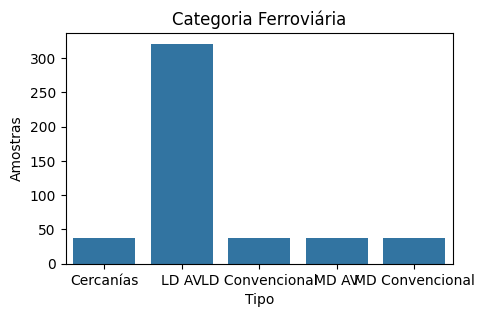

In [10]:
#gráfico de barras simples para ter noção de como os dados estão ditribuidos por tipo de serviço
plt.figure(figsize=(5, 3))

sns.countplot(x='Tipo de producto', data=df2)
plt.title('Categoria Ferroviária')
plt.xlabel('Tipo')
plt.ylabel('Amostras')
plt.show()

No gráfico acima é possível verificar que as amostras de Longa Distância Alda Velocidade são bem superiores. Tal fato deve-se à malha ferroviária estar concentrada nesse tipo. Abaixo tal informação é demonstrada por tabela (importante para saber com exatidão).

In [11]:
#Soma da variável Tipo e Produto em formato de tabela
contagem =df2['Tipo de producto'].value_counts().sort_index
print(contagem)

<bound method Series.sort_index of Tipo de producto
LD AV              321
Cercanías           37
LD Convencional     37
MD AV               37
MD Convencional     37
Name: count, dtype: int64>


## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [12]:
# estatísticas descritivas básicas do dataset
pd.set_option('display.float_format', '{:.2f}'.format)
df2.describe()

,Plazas Ofertadas (Núm),Plazas.km Ofertadas (Plazas.km),Tren.km (Tren.km),Viajeros (Núm),Viajeros.km (Viajeros.km)
count,372.00,452.00,452.00,452.00,452.00
mean,10470685.24,1085326931.72,3243293.29,9354959.04,524119044.67
std,29058713.16,1470781648.44,4411253.05,27147390.45,508344744.93
min,1748.00,826804.00,1892.00,1443.00,641233.00
25%,536807.75,299119004.50,681599.00,492663.50,194585616.25
50%,913829.50,474535847.50,1250043.50,789984.00,334258257.50
75%,2737230.00,1299180410.00,3188676.50,2264172.75,672476806.25
max,121547663.00,6069115965.00,16995461.00,118217647.00,2230226581.00


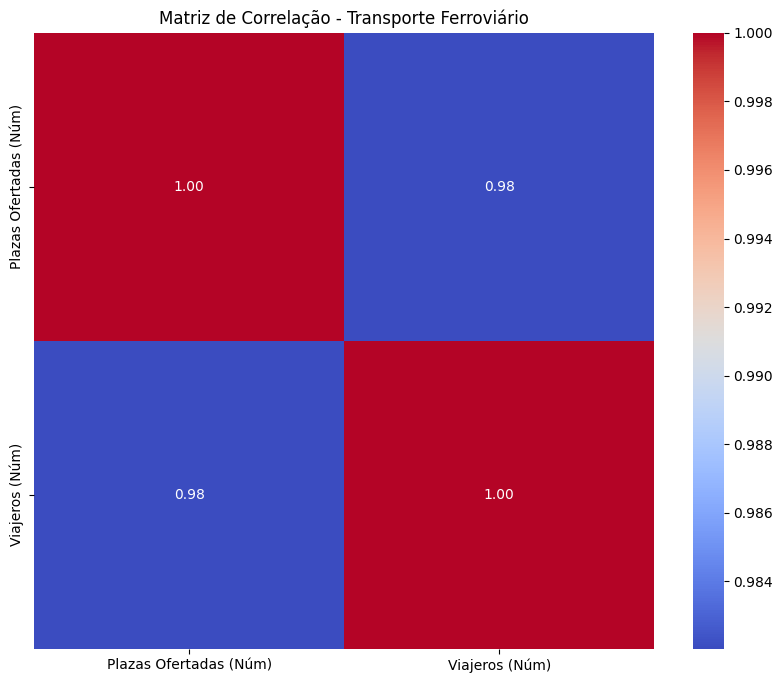

In [13]:
# Selecionar apenas duas colunas "teoricamente" correlacionadas para verificar sua correlação.
variaveis_numericas = df2[['Plazas Ofertadas (Núm)',
                           'Viajeros (Núm)']]

# Gerar a matriz de correlação
matriz_correlacao = variaveis_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação - Transporte Ferroviário')
plt.show()


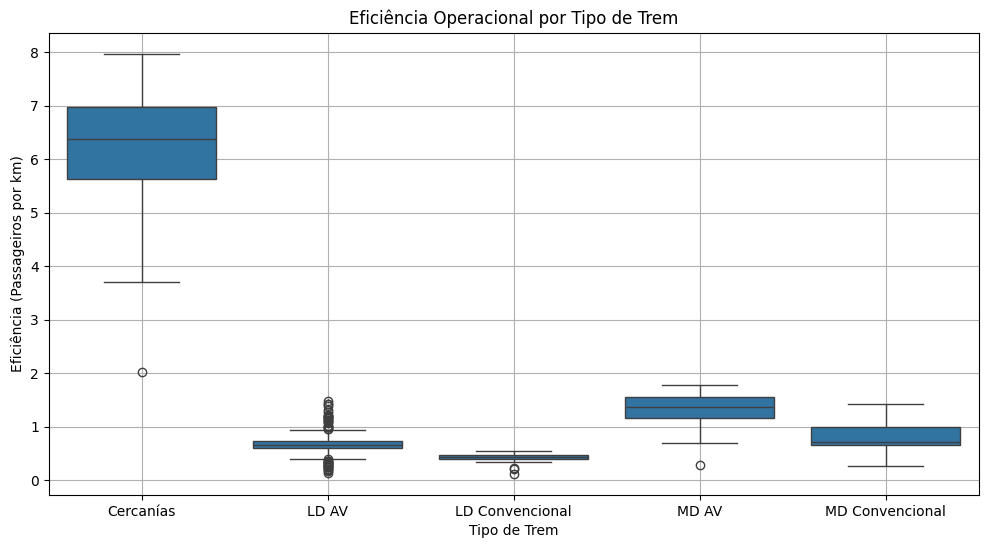

In [14]:
#Boxplot - criando uma coluna para medir eficiência
# Criar a coluna de eficiência
df2['Eficiência (pass/km)'] = df2['Viajeros (Núm)'] / df2['Tren.km (Tren.km)']

# Criar boxplot por tipo de produto
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2, x='Tipo de producto', y='Eficiência (pass/km)')
plt.title('Eficiência Operacional por Tipo de Trem')
plt.xlabel('Tipo de Trem')
plt.ylabel('Eficiência (Passageiros por km)')
plt.grid(True)
plt.show()


**Hipótese 1**

Analisar assentos ofertados ao longo do tempo para tentar entender se o sistema ferroviário vem disponibilizando mais ou menos espaços.

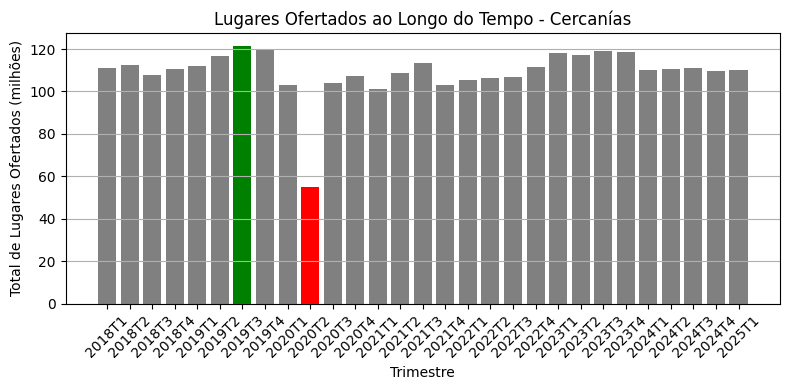

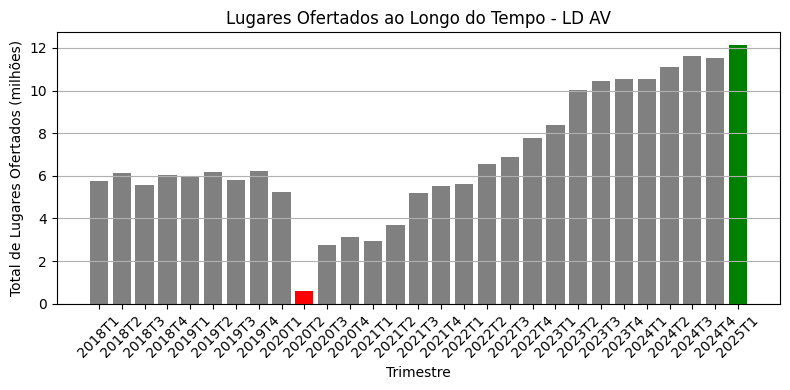

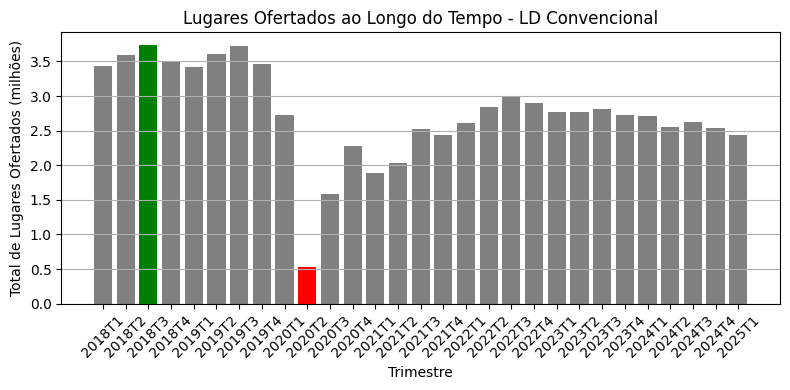

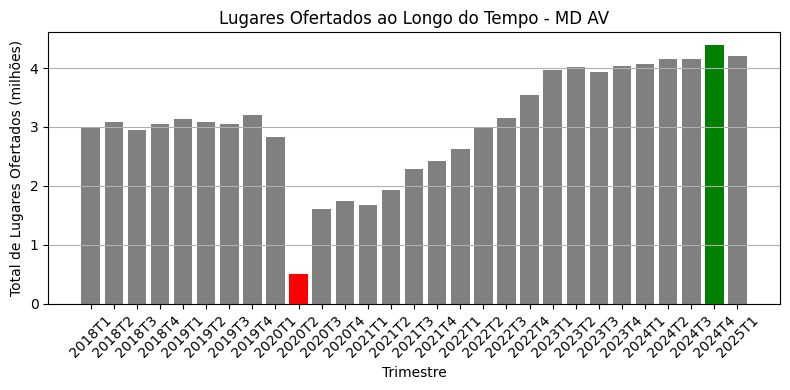

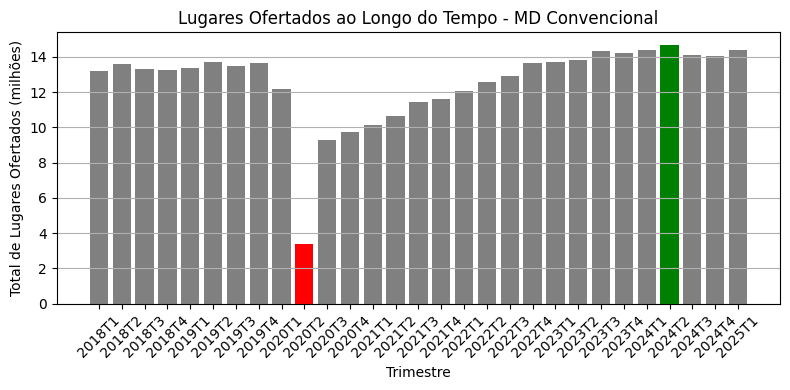

In [15]:
# Criar variável para tipo de trem.
tipos_produto = df2['Tipo de producto'].unique()

# Criar um gráfico de barras para cada tipo de produto
for tipo in tipos_produto:
    plt.figure(figsize=(8, 4))

    # Filtrar os dados apenas para o tipo de produto atual
    dados_tipo = df2[df2['Tipo de producto'] == tipo]

    # Excluir trimestres indesejados sem dados
    dados_tipo = dados_tipo[~dados_tipo['Trimestre'].str.contains('2016|2017')]

    # Agrupar por Trimestre e somar as vagas ofertadas
    oferta_trimestral = dados_tipo.groupby('Trimestre')['Plazas Ofertadas (Núm)'].sum()

    # Converter para milhões
    oferta_trimestral = oferta_trimestral / 1_000_000

    # Desabilitar notação científica
    plt.ticklabel_format(style='plain', axis='y')


    cores = []
    max_valor = oferta_trimestral.max()
    min_valor = oferta_trimestral.min()

    for valor in oferta_trimestral:
        if valor == max_valor:
            cores.append('green')  # maior
        elif valor == min_valor:
            cores.append('red')    # menor
        else:
            cores.append('grey')

    # Gerar gráfico de barras
    plt.bar(oferta_trimestral.index, oferta_trimestral.values, color=cores)
    plt.title(f'Lugares Ofertados ao Longo do Tempo - {tipo}')
    plt.xlabel('Trimestre')
    plt.ylabel('Total de Lugares Ofertados (milhões)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()




Conseguimos concluir nos gráficos acima que os menores valores foram no 2 trimestre de 2020, justamente no pico da pandemia na Espanha.

Já os pontos máximos estão espalhados a depender do tipo de trem. É possível inferir que a troca dos trens para modelos de alta velocidade estão levando os máximos para os trimestres mais recentes, enquanto os modelos convencionais tiveram seus máximos em anos anteriores justamente por não terem novas expansões. No entanto, os trens de Média Distância Convencionais registraram seu máximo histórico em 2024 (ainda que próximos dos valores pré-pandemia).

Os trens de cercanía ainda não superaram o máximo histórico, muito provavelmente porque se destinam ao transporte diario de passageiros casa-trabalho. Após a pandemia, a dinâmica desse deslocamento ainda não retornou aos níveis anteriores.

Para buscar melhor entendimento, foi gerado abaixo dois gráficos agrupando Média distância (Convencional e Alta Velocidade) e Longa Distância (Convencional e Alta velocidade). Como esperado o ponto de minima segue sendo o 2Trimestre de 2020 e o de máxima em trimestres recentes.

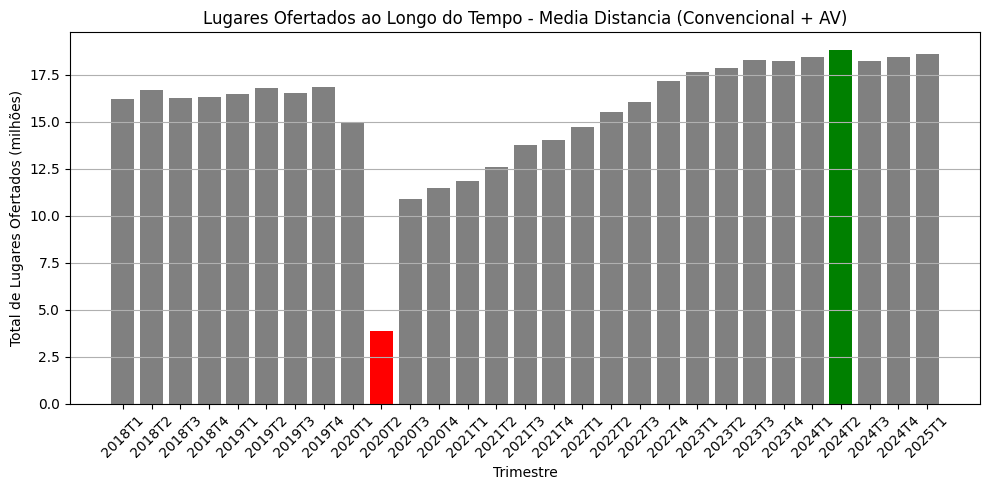

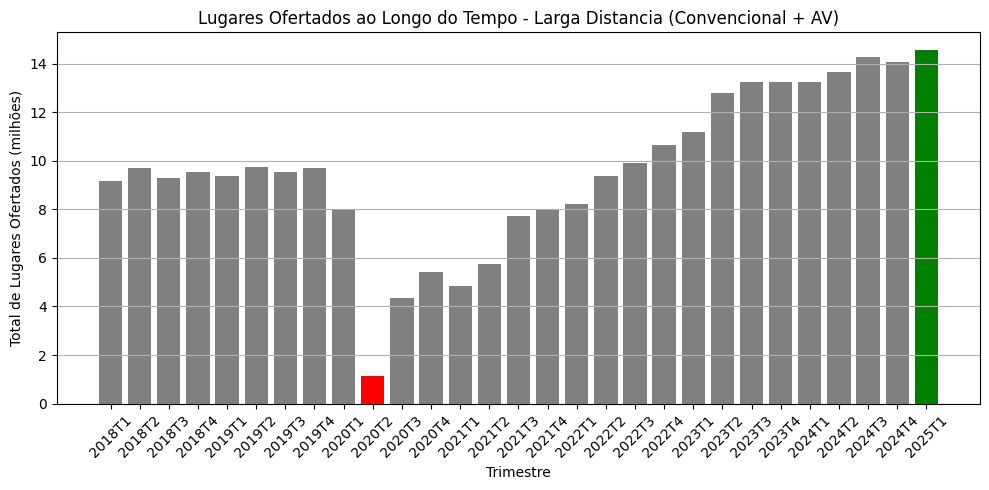

In [16]:
# Criar dicionário com os dois grupos desejados
grupos = {
    'Media Distancia (Convencional + AV)': ['MD Convencional', 'MD AV'],
    'Larga Distancia (Convencional + AV)': ['LD Convencional', 'LD AV']
}

for nome_grupo, tipos in grupos.items():
    plt.figure(figsize=(10, 5))

    # Filtrar os dados apenas para os tipos de produto do grupo atual
    dados_tipo = df2[df2['Tipo de producto'].isin(tipos)]

    # Excluir trimestres indesejados sem dados
    dados_tipo = dados_tipo[~dados_tipo['Trimestre'].str.contains('2016|2017')]

    # Agrupar por Trimestre e somar as vagas ofertadas
    oferta_trimestral = dados_tipo.groupby('Trimestre')['Plazas Ofertadas (Núm)'].sum()

    # Converter para milhões
    oferta_trimestral = oferta_trimestral / 1_000_000

    # Desabilitar notação científica
    plt.ticklabel_format(style='plain', axis='y')

    # Criar vetor de cores
    cores = []
    max_valor = oferta_trimestral.max()
    min_valor = oferta_trimestral.min()

    for valor in oferta_trimestral:
        if valor == max_valor:
            cores.append('green')  # maior valor
        elif valor == min_valor:
            cores.append('red')    # menor valor
        else:
            cores.append('grey')   # demais barras

    # Plotar o gráfico de barras
    plt.bar(oferta_trimestral.index, oferta_trimestral.values, color=cores)
    plt.title(f'Lugares Ofertados ao Longo do Tempo - {nome_grupo}')
    plt.xlabel('Trimestre')
    plt.ylabel('Total de Lugares Ofertados (milhões)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


**Hipótese 2**

Eficiência: analisar Passageiros/KM: trens de cercanías (i.e atuam em região metropolitana) transportam mais passageiros por KM, mas desejamos verificar se *Média Distância* também seria mais eficiente que *Longa Distância*

In [17]:
# Separar em três grupos
grupos = {
    'Media Distancia': ['MD Convencional', 'MD AV'],
    'Larga Distancia': ['LD Convencional', 'LD AV'],
    'Cercanías':['Cercanías']
}

# Lista para armazenar os resultados
resultados = []

for nome_grupo, tipos in grupos.items():
    # Filtrar os dados apenas para os tipos de produto do grupo atual
    dados_grupo = df2[df2['Tipo de producto'].isin(tipos)]

    # Calcular os totais para o grupo
    total_passageiros = dados_grupo['Viajeros (Núm)'].sum()
    total_km = dados_grupo['Tren.km (Tren.km)'].sum()

    # Calcular a eficiência (passageiros por km)
    eficiencia = total_passageiros / total_km

    # Armazenar os resultados
    resultados.append({'Grupo': nome_grupo,
                       'Total Passageiros': total_passageiros,
                       'Total km': total_km,
                       'Eficiência (passageiros/km)': round(eficiencia, 4)})


tabela_eficiencia = pd.DataFrame(resultados)

tabela_eficiencia


,Grupo,Total Passageiros,Total km,Eficiência (passageiros/km)
0,Media Distancia,310874692.00,346067628.00,0.90
1,Larga Distancia,300839789.00,532094695.00,0.57
2,Cercanías,3616727006.00,587806244.00,6.15


Nota-se que o índice de eficiência medido pelos trens de longa distância são inferiores ao de média distância.

**Hipótese 3**

Verificar eficiência entre convencionais e alta Velocidade (AV) - dividindo em grupos de AV (Média e Longa distâncias) e Convencional (Média e Longa distâncias).


In [18]:
# Lista dos tipos de trem que você quer na tabela final
tipos_trem = ['Cercanías', 'MD Convencional', 'MD AV', 'LD Convencional', 'LD AV']

# Lista para armazenar os resultados
resultados = []

for tipo in tipos_trem:
    # Filtrar os dados apenas para o tipo de trem atual
    dados_tipo = df2[(df2['Tipo de producto'] == tipo)]

    # Calcular total de passageiros e total de km
    total_passageiros = dados_tipo['Viajeros (Núm)'].sum()
    total_km = dados_tipo['Tren.km (Tren.km)'].sum()

    # Calcular eficiência
    eficiencia = total_passageiros / total_km if total_km > 0 else 0

    resultados.append({
        'Tipo de Trem': tipo,
        'Total Passageiros': total_passageiros,
        'Total Km': total_km,
        'Eficiência (passageiros/km)': round(eficiencia, 4)
    })

# Tabel Final
tabela_eficiencia_tipos = pd.DataFrame(resultados)
tabela_eficiencia_tipos


,Tipo de Trem,Total Passageiros,Total Km,Eficiência (passageiros/km)
0,Cercanías,3616727006.00,587806244.00,6.15
1,MD Convencional,232726728.00,289107084.00,0.81
2,MD AV,78147964.00,56960544.00,1.37
3,LD Convencional,88608266.00,210452429.00,0.42
4,LD AV,212231523.00,321642266.00,0.66


Nota-se na tabela acima que ao separar a eficiência por tipo de trem e trajeto vemos que os trens de alta velocidade possuem maior eficiência. Este valor corrobora para uma constante renovação da malha ferroviária espanhola, substituindo trens condicionais por alta velocidade.

## Regressão Linear

Foram adotados abaixo dois modelos de regressão com o intuito de prever passageiros por semestre.


*   No primeiro caso foi proposta uma previsão trimestral, seguindo
*   Já o segundo foi feita uma divisão nos valores de trimestre com o intuito de criar índices mensais. Por trás desse mecanismo está a tentativa de gerar nova regressão com uma base maior de observações, podendo comparar os resultados.

Foram gerados, usando a mesma metodologia gráficos de linha e também tabelas.

Em ambos os casos foram excluidos das observações de 2020 (2T, 3T, 4T) e 2021 (1T, 2T). Tal medida visa retirada de obssrvações feitas na pandemia de covid19 que refletem um momento atípico com baixíssimo fluxo de passageiros.



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipython-input-19-4285921282.py:42: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  futuras_datas = pd.date_range(start=ultima_data + pd.DateOffset(months=3), periods=periodos_futuros, freq='Q')


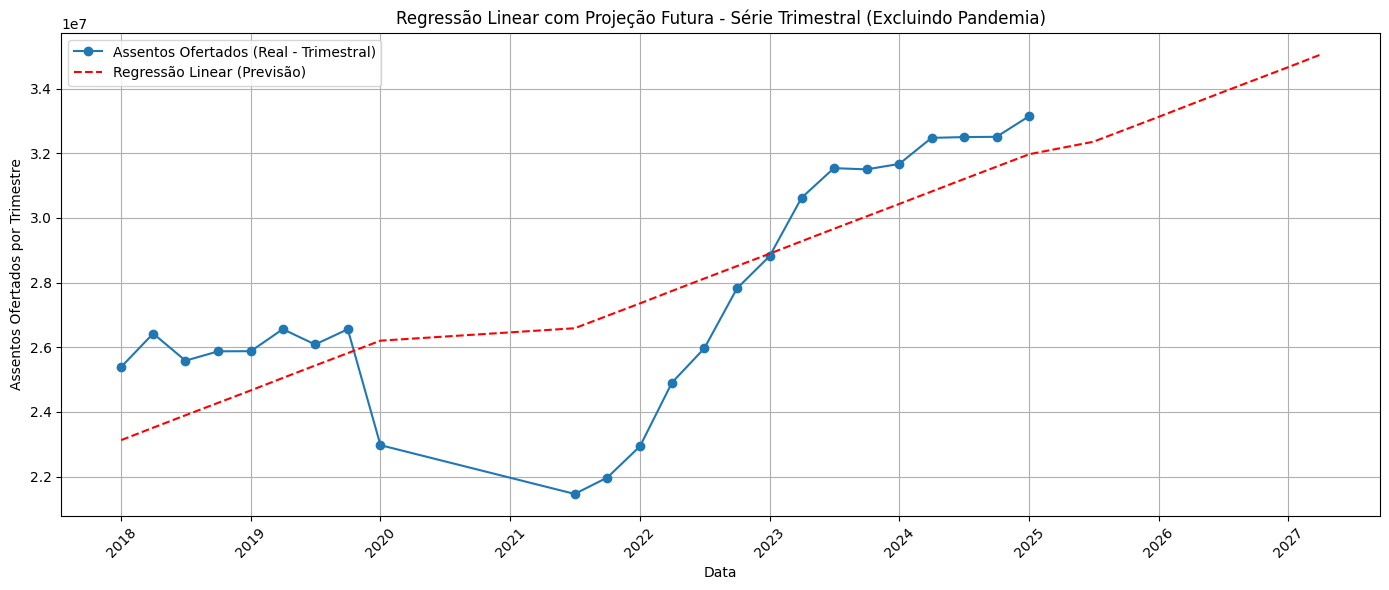

In [19]:

from sklearn.linear_model import LinearRegression
#Dados Trimestrais
# Preparar os dados
df2['Ano'] = df2['Trimestre'].str.extract(r'(\d{4})').astype(int)
df2['Trimestre_num'] = df2['Trimestre'].str.extract(r'T(\d)').astype(int)
meses_inicio = {1: '01', 2: '04', 3: '07', 4: '10'}
df2['Data'] = pd.to_datetime(df2['Ano'].astype(str) + '-' + df2['Trimestre_num'].map(meses_inicio) + '-01')

# Criar filtro para excluir os trimestres da pandemia
filtro_exclusao = (
    ((df2['Ano'] == 2020) & (df2['Trimestre_num'].isin([2, 3, 4]))) |
    ((df2['Ano'] == 2021) & (df2['Trimestre_num'].isin([1, 2])))
)

# Aplicar o filtro
df_filtrado = df2[
    (~df2['Tipo de producto'].str.contains('Cercanías')) &
    (~df2['Plazas Ofertadas (Núm)'].isnull()) &
    (~filtro_exclusao)
]

# Agrupar por Data e somar as ofertas
df_trimestral = df_filtrado.groupby('Data')['Plazas Ofertadas (Núm)'].sum().reset_index()
df_trimestral.columns = ['ds', 'y']

# Criar variável temporal numérica
df_trimestral['tempo'] = np.arange(len(df_trimestral))

# Criar e ajustar o modelo de regressão linear
X = df_trimestral[['tempo']]
y = df_trimestral['y']
modelo_linear = LinearRegression()
modelo_linear.fit(X, y)

# Projetar 8 trimestres futuros
periodos_futuros = 8
novo_tempo = np.arange(len(df_trimestral) + periodos_futuros)
previsoes_completas = modelo_linear.predict(novo_tempo.reshape(-1, 1))

# Criar datas futuras trimestrais
ultima_data = df_trimestral['ds'].max()
futuras_datas = pd.date_range(start=ultima_data + pd.DateOffset(months=3), periods=periodos_futuros, freq='Q')

# Criar DataFrame para plotagem
df_futuro = pd.DataFrame({
    'ds': list(df_trimestral['ds']) + list(futuras_datas),
    'previsao': previsoes_completas
})

# Plotar o resultado
plt.figure(figsize=(14, 6))
plt.plot(df_trimestral['ds'], df_trimestral['y'], marker='o', label='Assentos Ofertados (Real - Trimestral)')
plt.plot(df_futuro['ds'], df_futuro['previsao'], color='red', linestyle='--', label='Regressão Linear (Previsão)')
plt.title('Regressão Linear com Projeção Futura - Série Trimestral (Excluindo Pandemia)')
plt.xlabel('Data')
plt.ylabel('Assentos Ofertados por Trimestre')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
#Tabela para valores trimestrais
total_dados = len(df_futuro)
total_historico = len(df_trimestral)
valores_reais = list(df_trimestral['y']) + [None] * (total_dados - total_historico)

# Criar DataFrame final para tabela
df_resultado_trimestral = pd.DataFrame({
    'Data': df_futuro['ds'],
    'Valor Real': valores_reais,
    'Previsao': df_futuro['previsao']
})


from IPython.display import display
display(df_resultado_trimestral)



,Data,Valor Real,Previsao
0,2018-01-01,25391620.00,23128110.26
1,2018-04-01,26423450.00,23512496.13
2,2018-07-01,25583891.00,23896882.00
3,2018-10-01,25873931.00,24281267.87
4,2019-01-01,25877766.00,24665653.75
5,2019-04-01,26559633.00,25050039.62
6,2019-07-01,26085314.00,25434425.49
7,2019-10-01,26556625.00,25818811.36
8,2020-01-01,22971459.00,26203197.24
9,2021-07-01,21462921.00,26587583.11


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipython-input-21-1483035918.py:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  futuras_datas = pd.date_range(start=ultima_data + pd.DateOffset(months=1), periods=periodos_futuros, freq='M')


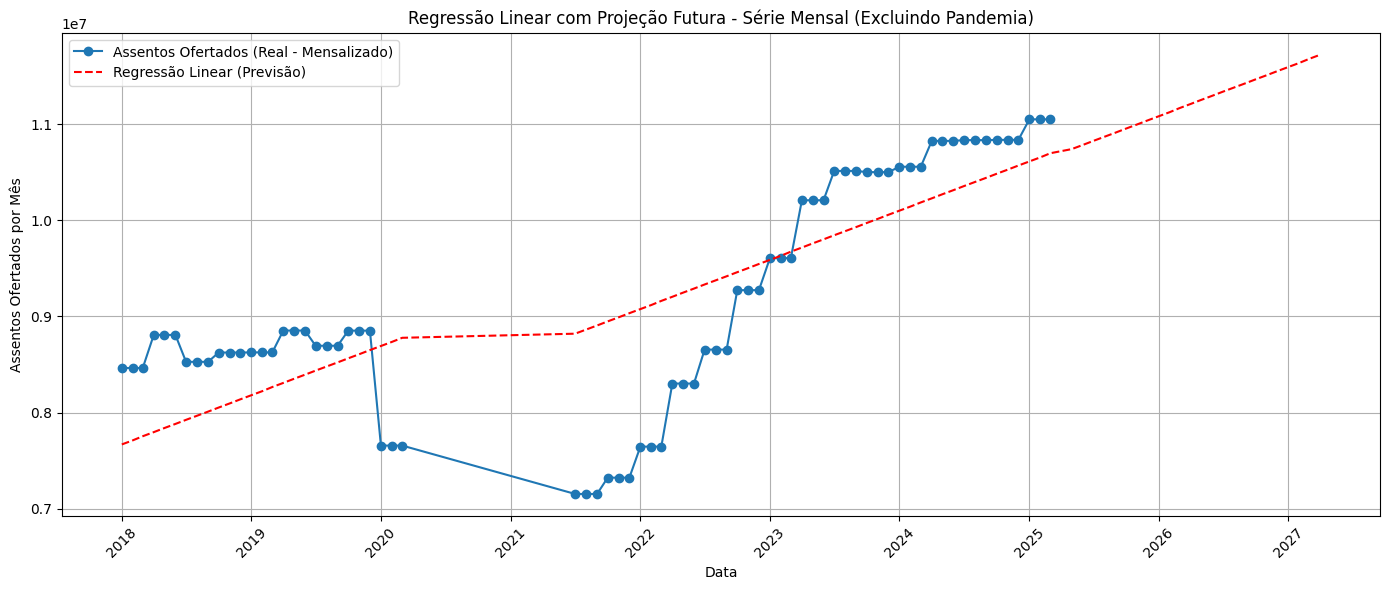

In [21]:
#Dados Mensais
# Preparar os dados
df2['Ano'] = df2['Trimestre'].str.extract(r'(\d{4})').astype(int)
df2['Trimestre_num'] = df2['Trimestre'].str.extract(r'T(\d)').astype(int)
meses_inicio = {1: '01', 2: '04', 3: '07', 4: '10'}
df2['Data'] = pd.to_datetime(df2['Ano'].astype(str) + '-' + df2['Trimestre_num'].map(meses_inicio) + '-01')

# Criar filtro para excluir os trimestres da pandemia
filtro_exclusao = (
    ((df2['Ano'] == 2020) & (df2['Trimestre_num'].isin([2, 3, 4]))) |
    ((df2['Ano'] == 2021) & (df2['Trimestre_num'].isin([1, 2])))
)

# Aplicar o filtro
df_filtrado = df2[
    (~df2['Tipo de producto'].str.contains('Cercanías')) &
    (~df2['Plazas Ofertadas (Núm)'].isnull()) &
    (~filtro_exclusao)
]

# Agrupar por Data e somar as ofertas
df_trimestral = df_filtrado.groupby('Data')['Plazas Ofertadas (Núm)'].sum().reset_index()
df_trimestral.columns = ['ds', 'y']

# Transformar trimestral em mensal (distribuindo uniformemente)
dados_mensais = []
for index, row in df_trimestral.iterrows():
    data_inicio = row['ds']
    valor_mensal = row['y'] / 3  # Dividir o valor trimestral em 3 meses
    for i in range(3):
        nova_data = data_inicio + pd.DateOffset(months=i)
        dados_mensais.append({'ds': nova_data, 'y': valor_mensal})

# Criar DataFrame mensal
df_mensal = pd.DataFrame(dados_mensais)
df_mensal = df_mensal.sort_values('ds').reset_index(drop=True)

# Criar variável temporal numérica
df_mensal['tempo'] = np.arange(len(df_mensal))

# Criar e ajustar o modelo de regressão linear
X = df_mensal[['tempo']]
y = df_mensal['y']
modelo_linear = LinearRegression()
modelo_linear.fit(X, y)

# Projetar 24 meses futuros (8 trimestres)
periodos_futuros = 24
novo_tempo = np.arange(len(df_mensal) + periodos_futuros)
previsoes_completas = modelo_linear.predict(novo_tempo.reshape(-1, 1))

# Criar datas futuras
ultima_data = df_mensal['ds'].max()
futuras_datas = pd.date_range(start=ultima_data + pd.DateOffset(months=1), periods=periodos_futuros, freq='M')

# Criar DataFrame para plotagem
df_futuro = pd.DataFrame({
    'ds': list(df_mensal['ds']) + list(futuras_datas),
    'previsao': previsoes_completas
})

# Plotar o resultado
plt.figure(figsize=(14, 6))
plt.plot(df_mensal['ds'], df_mensal['y'], marker='o', label='Assentos Ofertados (Real - Mensalizado)')
plt.plot(df_futuro['ds'], df_futuro['previsao'], color='red', linestyle='--', label='Regressão Linear (Previsão)')
plt.title('Regressão Linear com Projeção Futura - Série Mensal (Excluindo Pandemia)')
plt.xlabel('Data')
plt.ylabel('Assentos Ofertados por Mês')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
#Tabela Mensal
total_dados = len(df_futuro)
total_historico = len(df_mensal)
valores_reais = list(df_mensal['y']) + [None] * (total_dados - total_historico)


df_resultado_mensal = pd.DataFrame({
    'Data': df_futuro['ds'],
    'Valor Real': valores_reais,
    'Previsao': df_futuro['previsao']
})


from IPython.display import display
display(df_resultado_mensal)

,Data,Valor Real,Previsao
0,2018-01-01,8463873.33,7669000.79
1,2018-02-01,8463873.33,7711644.41
2,2018-03-01,8463873.33,7754288.03
3,2018-04-01,8807816.67,7796931.65
4,2018-05-01,8807816.67,7839575.27
...,...,...,...
91,2026-11-30,NaN,11549570.11
92,2026-12-31,NaN,11592213.73
93,2027-01-31,NaN,11634857.35
94,2027-02-28,NaN,11677500.97
